
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: October 19, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Jocelyne Walker (EID- jvw359)
2. Shruti Kolhatkar (EID-sgk637)

# Question 1 - MLP Regressor (15 pts) 
In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python; http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.

The following code will pre-process the data and split the data into training and test sets using train_test_split with random state 30 and test_size = 0.25.

The dataset is loaded from q2_data.csv which contains features of engine and the predictor varialble is "mpg". The features are:
* cylinders 
* displacement
* horsepower
* weight
* acceleration

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline


df = pd.read_csv('q2_data.csv') 
df.dropna(inplace=True)
df.columns
y = df['mpg'].values
X = df.drop(['mpg'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 5) (294,) (98, 5) (98,)


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


We also want to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.


   
1) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler) for the different number of hidden units.

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)*

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005
    
   Which of the three models ((a)-(c)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.


2) (**5pts**) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using the following three conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*:

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)* 

   
3) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set for different batch size. 

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)
   
   Plot three different figures for the three batch size, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*: 

   (a) *batch_size = 1* 
   
   (b) *batch_size = 20*  
   
   (c) *batch_size = 2000* 
     
   **Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000.**

# Answer 1

**Question 1**

In [ ]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

regr_a = MLPRegressor(hidden_layer_sizes = (5,),
                      activation = 'tanh', 
                      solver = 'sgd', 
                      learning_rate= 'constant', 
                      random_state=42, 
                      batch_size= 20,       
                      learning_rate_init = 0.005).fit(X_train, y_train)
print('A Train RMSE:', np.sqrt(mean_squared_error(y_train, regr_a.predict(X_train))))
print('A Test RMSE:', np.sqrt(mean_squared_error(y_test, regr_a.predict(X_test))))

regr_b = MLPRegressor(hidden_layer_sizes = (15,),
                      activation = 'tanh', 
                      solver = 'sgd', 
                      learning_rate= 'constant', 
                      random_state=42, 
                      batch_size= 20,       
                      learning_rate_init = 0.005).fit(X_train, y_train)
print('\nB Train RMSE:', np.sqrt(mean_squared_error(y_train, regr_b.predict(X_train))))
print('B Test RMSE:', np.sqrt(mean_squared_error(y_test, regr_b.predict(X_test))))

regr_c = MLPRegressor(hidden_layer_sizes = (50,),
                      activation = 'tanh', 
                      solver = 'sgd', 
                      learning_rate= 'constant', 
                      random_state=42, 
                      batch_size= 20,       
                      learning_rate_init = 0.005).fit(X_train, y_train)
print('\nC Train RMSE:', np.sqrt(mean_squared_error(y_train, regr_c.predict(X_train))))
print('C Test RMSE:', np.sqrt(mean_squared_error(y_test, regr_c.predict(X_test))))

A Train RMSE: 3.3601289540161896
A Test RMSE: 4.7984130428905605

B Train RMSE: 3.019913013712589
B Test RMSE: 4.5517066936252295

C Train RMSE: 2.940964154111819
C Test RMSE: 4.7726684612395305


**Which of the three models ((a)-(c)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.**

Model B performs the best of the three models. It results in the lowest Testing RMSE with a value of 4.55. When we increase the number of hidden units to 50, this overfits the data to the training set, reducing training RMSE, but increasing the testing RMSE. Thus, the model B with 15 hidden layer units is the best model.

**Question 2:** Plot the three curves

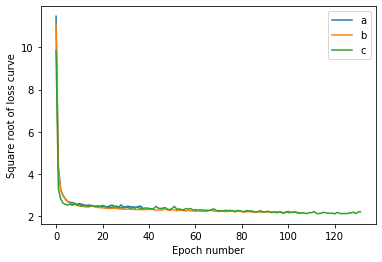

In [ ]:
plt.plot(np.sqrt(regr_a.loss_curve_))
plt.plot(np.sqrt(regr_b.loss_curve_))
plt.plot(np.sqrt(regr_c.loss_curve_))

plt.xlabel('Epoch number')
plt.ylabel('Square root of loss curve')
plt.legend(labels = ['a','b','c'])

**Question 3**

C:\Users\jocel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:352: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


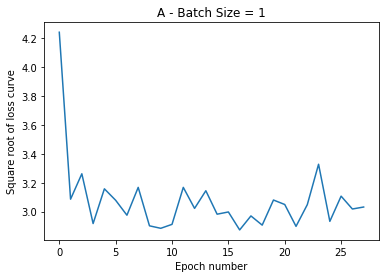

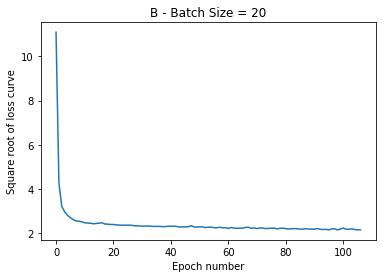

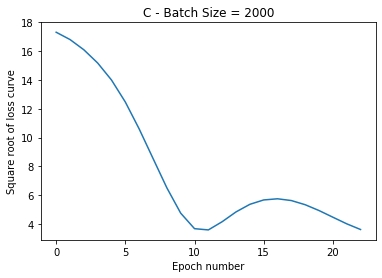

In [ ]:
regr_a3 = MLPRegressor(batch_size = 1,
                       activation = 'tanh', 
                       solver = 'sgd', 
                       learning_rate='constant', 
                       random_state=42,
                       learning_rate_init = 0.005 , 
                       hidden_layer_sizes = (15,)).fit(X_train, y_train)

regr_b3 = MLPRegressor(batch_size = 20,
                       activation = 'tanh', 
                       solver = 'sgd', 
                       learning_rate='constant', 
                       random_state=42,
                       learning_rate_init = 0.005 , 
                       hidden_layer_sizes = (15,)).fit(X_train, y_train)

regr_c3 = MLPRegressor(batch_size = 2000,
                       activation = 'tanh', 
                       solver = 'sgd', 
                       learning_rate='constant', 
                       random_state=42,
                       learning_rate_init = 0.005 , 
                       hidden_layer_sizes = (15,)).fit(X_train, y_train)

plt.plot(np.sqrt(regr_a3.loss_curve_))
plt.title('A - Batch Size = 1')
plt.xlabel('Epoch number')
plt.ylabel('Square root of loss curve')
plt.show()

plt.plot(np.sqrt(regr_b3.loss_curve_))
plt.title('B - Batch Size = 20')
plt.xlabel('Epoch number')
plt.ylabel('Square root of loss curve')
plt.show()

plt.plot(np.sqrt(regr_c3.loss_curve_))
plt.title('C - Batch Size = 2000')
plt.xlabel('Epoch number')
plt.ylabel('Square root of loss curve')
plt.show()

**Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000?**

Batch size helps us understand the speed and stability of the learning process. With the batch size of 1, we see that the learning process is fast but unstable as it oscillates after the first epoch. The batch size of 20 appears to be the best fit, as it learns quickly and then flattens out after about epoch 5. The large batch size of 2000 results in a much slower learning process. It does not flatten until epoch 10 and then increases again between epochs 10 and 20. 

# Question 2: Tensor Playground (15 points)
Visit https://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the data set on the top right (alternate colored squares).

Use these settings as the DEFAULT settings for all subquestions: test/training ratio = 50%, Noise = 0, Batch Size = 30, learning rate = 0.03, activation = tanh, one hidden layer with 2 neurons, input as $X_1$, $X_2$ and no Regularization.

1) Use the DEFAULT setting and run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? Why? (**4 pts**)

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.

2) Effect of number of hidden units: Go back to DEFAULT settings and report the train, test losses at the end of 1000 epochs for 4 and 8 neurons in the hidden layer (2 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? (**4 pts**)

3) Effect of learning rate and number of epochs: Go back to DEFAULT settings and set the activation to be Relu and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. (**4 pts**)

4) Go back to DEFAULT settings. Play around with any of the other hyperparameters, network architectures and input features (such as $\sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be at most 0.06). Attach the screenshot from Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. (**3 pts**)

# Answer 2

**Question 1**

**Experiment 1:** Tanh as activation function

Train loss after 1000 epochs: **0.191**

Test loss after 1000 epochs: **0.201**

**Experiment 2:** Linear activation function

Train loss after 1000 epochs: **0.495**

Test loss after 1000 epochs: **0.506**

In the linear activation function, we see that the decision boundary is a line through the diagonal of the output chart. This is because we used a linear activation function, so we do not have a universal approximator. It's just equivalent to a linear regression model. The colors are also much softer, indicating that the weight values are close to 0. 

With the tanh activation function, we see the decision boundary takes a non linear form with two nearly parallel lines forming the diagonal boundary between the blue and orange points. This is because the tanh function can act as a universal approximator to better estimate the boundaries between the two types of points. The colors are stronger, indicating that the weight values are closer to -1 and 1. 


**Question 2**

**Experiment 1:** 4 neurons in the hidden layer

Train loss after 1000 epochs: **0.015**

Test loss after 1000 epochs: **0.018**

**Experiment 2:** 8 neurons in the hidden layer

Train loss after 1000 epochs: **0.009**

Test loss after 1000 epochs: **0.013**

The decision boundary becomes more precise as the number of neurons in the hidden layer increases. This means that having more neurons in the hidden layer will lead to a better fitting of the training data. However, once we have too many neurons in the hidden layer, we may overfit the training data. Thus, when we went from 2 to 4 to 8 neurons in the hidden layer, our model better fit the training data. This is because they allow us to fit a wider variety of possible outputs. The 8 neuron network does not overfit the model as test loss continued to fall.


**Question 3** ReLU and 4 neurons in hidden layer

**Experiment 1:** Learning rate 10

Train loss after 100 epochs: **0.528**

Test loss after 100 epochs: **0.544**

Train loss after 1000 epochs: **0.528**

Test loss after 1000 epochs: **0.544**

**Experiment 2:** Learning rate 0.1

Train loss after 100 epochs: **0.008**

Test loss after 100 epochs: **0.009**

Train loss after 1000 epochs: **0.000**

Test loss after 1000 epochs: **0.003**

**Experiment 3:** Learning rate 0.01

Train loss after 100 epochs: **0.098**

Test loss after 100 epochs: **0.098**

Train loss after 1000 epochs: **0.009**

Test loss after 1000 epochs: **0.017**

**Experiment 4:** Learning rate 0.001

Train loss after 100 epochs: **0.410**

Test loss after 100 epochs: **0.413**

Train loss after 1000 epochs: **0.132**

Test loss after 1000 epochs: **0.117**

The loss curves show that that as learning rate is smaller, our loss curves get "slower" and flatten out. With the very low learning rate, the train and test loss do not fall sharply after 100 epochs. Instead, they slowly flatten out as the number of epochs increases. On the other hand, when the learning rate is very high, at 10, the train and test loss fall within 100 epochs and then get "stuck" at that value for all remaining epochs. They do not coverge to the optimal solution. The best learning rates were in the middle in this case. The train and test loss fall to a reasonable value within the first 100 epochs, and then continue to fall along the asymptote for the values between 100-1000 epochs. 



**Question 4**

At the DEFAULT settings, when we added  $\sin(X_1)$ and  $\sin(X_2)$, the model did quite well.

Train loss: **0.002**

Test loss: **0.008**

However, the best result occurred with features $X_1$, $X_2$, and $X_1 X_2$. 

Train loss: **0.001** and test loss: **0.004**

We decided to keep a learning rate of 0.03 because it did not lead to non-covergence, but also solved adequately quickly. Similarly, the tanh activation function is an adequate universal approximator. We kept two neurons in the hidden layer, but added another feature of $X_1 X_2$ becaise this allowed our network to more precisely map to the decision boundaries. Adding more features may help reduce the train loss, but it can also lead to overfitting and an overly complex model. This is why we decided to just include the one additional feature to result in still sufficient training and testing loss reduction.

<img src="q2part4.JPG">

# Question 3 - Feature Selection (20 pts)

In this question, we will explore the importance of feature selection, You can use the below code to load the dataset "zoo.csv". This dataset contains a set of features for different animals and the output is class_type 
corresponding to the features. The details of class_type is present in class.csv for your reference.

1. Plot the correlation matrix. The resulting correlation plot should be (n_features * n_features) matrix. List the top 5 most positively correlated features with class_type. (**3pts**)

2. List the top 5 most negatively correlated features with class_type. (**3pts**)

3. Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE to perform feature selection with estimator = LogisticRegression(max_iter=1000) estimator. List the top 5 features selected from RFE.(**2pts**)

* Create a train_test split of 80:20(train:test) with random state = 50

* We need to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

4. Train a MLP Regressor with train data and report the ${R^2}$ score on the test set for each of the following, 

   a) Model trained with top 5 most positvely correlated features from part 1
   
   b) Model trained with top 5 most negatively correlated features from part 2
   
   c) Model trained with five features selected by RFE from part 3
   
   d) Finally train a MLP Regressor on the entire training data with the entire orignal features.Use the default values for MLPRegressor as below(**8pts**)

    MLPRegressor(max_iter = 1000,random_state=1)

5. Explain your results based on your understanding of feature selection and the ${R^2}$ score.  (**4pts**) 

In [ ]:
df = pd.read_csv("zoo.csv")
df.columns
y = df['class_type'].values
X = df.drop(['class_type','animal_name'], axis = 1)

class_df = pd.read_csv("class.csv")

# Answer 3

**Question 1** - Correlation matrix

                hair  feathers      eggs      milk  airborne   aquatic  \
hair        1.000000 -0.427851 -0.817382  0.878503 -0.198431 -0.473554   
feathers   -0.427851  1.000000  0.419248 -0.410761  0.656553 -0.058552   
eggs       -0.817382  0.419248  1.000000 -0.938848  0.376646  0.376244   
milk        0.878503 -0.410761 -0.938848  1.000000 -0.366765 -0.362613   
airborne   -0.198431  0.656553  0.376646 -0.366765  1.000000 -0.172638   
aquatic    -0.473554 -0.058552  0.376244 -0.362613 -0.172638  1.000000   
predator   -0.154769 -0.104430  0.011605 -0.029721 -0.295181  0.375978   
toothed     0.492531 -0.613631 -0.642150  0.628168 -0.594311  0.053150   
backbone    0.191681  0.231403 -0.340420  0.384958 -0.104718  0.022463   
breathes    0.441149  0.254588 -0.382777  0.423527  0.286039 -0.637506   
venomous   -0.104245 -0.145739  0.098689 -0.242449  0.008528  0.087915   
fins       -0.280313 -0.223541  0.164796 -0.156328 -0.251157  0.604492   
legs        0.394009 -0.206686 -0.2249

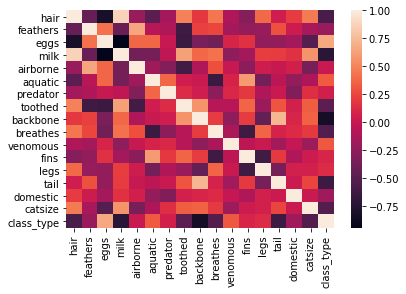

Top 5 Most Positively Correlated Features with Class Type
eggs        0.661825
aquatic     0.326639
venomous    0.321476
legs        0.131693
fins        0.099430
Name: class_type, dtype: float64


In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

replace = {1:1,2:1,3:1,4:1,5:1,6:0,7:0}

y_new = pd.Series([replace.get(x,x) for x in y], name = "class_type")

df_3_1 = pd.merge(X, y_new, right_index = True, left_index = True)
df_3_1.head()

corrMatrix = df.corr()
print(corrMatrix)

sn.heatmap(corrMatrix, annot=False)
plt.show()

print("Top 5 Most Positively Correlated Features with Class Type")
print(corrMatrix['class_type'].sort_values(ascending=False)[1:6])

In [ ]:
print("Top 5 Most Negatively Correlated Features with Class Type")
print(corrMatrix['class_type'].sort_values(ascending=True)[0:5])

Top 5 Most Negatively Correlated Features with Class Type
backbone   -0.828845
milk       -0.723683
tail       -0.631830
hair       -0.562384
catsize    -0.521030
Name: class_type, dtype: float64


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
rankings = pd.Series(selector.ranking_, name = 'ranking')
names = pd.Series(X.columns, name = 'name')

combined = pd.merge(names, rankings, left_index = True, right_index = True)
print("Top 5 features selected from RFE")
print(combined[combined['ranking']==1])

Top 5 features selected from RFE
       name  ranking
1  feathers        1
3      milk        1
7   toothed        1
8  backbone        1
9  breathes        1


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [ ]:
X_scaler = StandardScaler()

In [ ]:
from sklearn.metrics import r2_score

most_positive = corrMatrix['class_type'].sort_values(ascending=False)[1:6].index
X_train_a = X_train[most_positive]
X_test_a = X_test[most_positive]
X_train_a = X_scaler.fit_transform(X_train_a)
X_test_a = X_scaler.transform(X_test_a)

mod_a = MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_a, y_train)
print("Most Positively Correlated Predictors, Test R^2 Score")
print(r2_score(y_test, mod_a.predict(X_test_a)))



most_negative = corrMatrix['class_type'].sort_values(ascending=True)[0:5].index
X_train_b = X_train[most_negative]
X_test_b = X_test[most_negative]
X_train_b = X_scaler.fit_transform(X_train_b)
X_test_b = X_scaler.transform(X_test_b)

mod_b = MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_b, y_train)
print("\nMost Negatively Correlated Predictors, Test R^2 Score")
print(r2_score(y_test, mod_b.predict(X_test_b)))



rfe_selection = combined[combined['ranking']==1]['name'].values
X_train_c = X_train[rfe_selection]
X_test_c = X_test[rfe_selection]
X_train_c = X_scaler.fit_transform(X_train_c)
X_test_c = X_scaler.transform(X_test_c)

mod_c = MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_c, y_train)
print("\nRFE Selected Predictors, Test R^2 Score")
print(r2_score(y_test, mod_c.predict(X_test_c)))



X_train_d = X_scaler.fit_transform(X_train)
X_test_d = X_scaler.transform(X_test)

mod_d = MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_d, y_train)
print("\nAll Predictors, Test R^2 Score")
print(r2_score(y_test, mod_d.predict(X_test_d)))

Most Positively Correlated Predictors, Test R^2 Score
0.6895112688851421

Most Negatively Correlated Predictors, Test R^2 Score
0.8346085417665577

RFE Selected Predictors, Test R^2 Score
0.9702879461830074

All Predictors, Test R^2 Score
0.9690391877029567


**Explain your results based on your understanding of feature selection and the ${R^2}$ score.**

The models that selected only the positively correlated or negatively correlated features perform worse as we run into multi-collinearity issues when selecting predictors that tell us the same or similar information about our output variables. 

The RFE selected predictors perform the best because the RFE selection allows us to pick the "best combination" of predictors while not leading to overfitting. We see in the model with all predictors, the test R-Squared falls slightly, indicating some overfitting when we include all predictors in the model. 

# Question 4 (Data Pre-processing - 25pts)
The following dataset contains House Sales data in King County, USA. This dataset contains house sale prices for King County, which includes Seattle. This dataset contains the following columns:

* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors: Total floors (levels) in house
* waterfront: House which has a view to a waterfront (0/1)
* view: Has been viewed (0-4)
* condition: How good the condition is Overall (1-5)
* grade: Overall grade given to the housing unit, based on King County grading system (1-13)
* sqft_above: Square footage of house apart from basement
* sqft_basement: Square footage of the basement
* yr_built: Built Year
* yr_renovated: Year when house was renovated
* zipcode: Zip code
* price: Selling price of house

Here, price is the dependent variable while all other variables are assumed to be independent variables. Here, 10% cells of most columns in the dataset contain NaN value.

In [3]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import io
from google.colab import files

np.random.seed(100)

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))

#df = pd.read_csv("kc_house_data.csv")
age = df['yr_renovated']
built = df['yr_built']
df.iloc[:, :-1] = df[:-1].mask(np.random.random(df[:-1].shape)<0.1)
df['yr_renovated'] = age
df['yr_built'] = built
df.head()

Saving kc_house_data.csv to kc_house_data.csv


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,0,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,0,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,0,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,0,98074.0,510000.0


### Question 4.1 (5 points)
Print the number of NaN values in each column. Next, if the value of `yr_renovated` is equal to 0, set it equal to the corresponding value of `yr_built`.

In [4]:
print("Number of NaN values in each column")
print(df.isna().sum())

df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']
df.head()

Number of NaN values in each column
bedrooms         2150
bathrooms        2150
sqft_living      2170
sqft_lot         2091
floors           2152
waterfront       2179
view             2184
condition        2096
grade            2135
sqft_above       2163
sqft_basement    2198
yr_built            0
yr_renovated        0
zipcode          2169
price               0
dtype: int64


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0


### Question 4.2 (6 points)

Create a copy of `df` named `df_dm` and create a new column in `df_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use [pandas.cut()](https://stackoverflow.com/a/31740881) and modify its paramter list as below:
- `bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]`
- `labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']`
- `include_lowest=True`

Next, perform one-hot encoding using this new column.

In [5]:
df_dm = df.copy()

bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']

df_dm['binned_yr_built'] = pd.cut(df['yr_built'],bins,labels=labels,include_lowest=True)

binned_yr_dummy = pd.get_dummies(df_dm.binned_yr_built, prefix = 'yr_built')
#print(binned_yr_dummy)

df_dm = pd.merge(df_dm, binned_yr_dummy, left_index = True, right_index = True)

df_dm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price,binned_yr_built,yr_built_1900-1920,yr_built_1920-1940,yr_built_1940-1960,yr_built_1960-1980,yr_built_1980-2000,yr_built_2000-2020
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955,98178.0,221900.0,1940-1960,0,0,1,0,0,0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0,1940-1960,0,0,1,0,0,0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933,NaN,180000.0,1920-1940,0,1,0,0,0,0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965,NaN,604000.0,1960-1980,0,0,0,1,0,0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0,1980-2000,0,0,0,0,1,0


## Question 4.3 (4 points)
Create a copy of `df` named `temp_df`. Drop all rows in `temp_df` that contain any null value and run a linear regression model using a train-test split with `test_size=0.3` and `random_state=42`.

In [6]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

temp_df = df.copy()
temp_df = temp_df.dropna()

y = temp_df['price'].values
X = temp_df.drop(['price'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

linreg_4_3 = linear_model.LinearRegression().fit(X_train,y_train)

print("Test R-squared score")
print(r2_score(y_test, linreg_4_3.predict(X_test)))

Test R-squared score
0.6683819021913644


## Question 4.4 (8 points)

Use `df` to create a train/test split with `test_size=0.30` and `random_state=42`. Use the following imputation methods to fill in all NaN values for the obtained training set.
- mean (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- median (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- most_frequent (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- k-Nearest Neighbors (using [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)) - Run this four times with the value of `n_neighbors` = 2, 5, 10 and 20.

For each method, impute the test set with the same imputer and print the test $R^2$ score obtained using a linear regression model. Which method gives the best result? What can you say from the result of a) SimpleImputer and b) KNNImputer?

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

y = df['price'].values
X = df.drop(['price'], axis = 1)

# mean
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp_mean.fit_transform(X_train)
X_test = imp_mean.transform(X_test)

linreg_4_4_a = linear_model.LinearRegression().fit(X_train,y_train)
print("Mean Transformed - Test R-squared score")
print(r2_score(y_test, linreg_4_4_a.predict(X_test)))



# median
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
X_train = imp_median.fit_transform(X_train)
X_test = imp_median.transform(X_test)

linreg_4_4_b = linear_model.LinearRegression().fit(X_train,y_train)
print("\nMedian Transformed - Test R-squared score")
print(r2_score(y_test, linreg_4_4_b.predict(X_test)))



# most_frequent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train = imp_most_freq.fit_transform(X_train)
X_test = imp_most_freq.transform(X_test)

linreg_4_4_c = linear_model.LinearRegression().fit(X_train,y_train)
print("\nMost Frequent Transformed - Test R-squared score")
print(r2_score(y_test, linreg_4_4_c.predict(X_test)))



# k-Nearest Neighbors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

imp_2 = KNNImputer(n_neighbors = 2)
X_train = imp_2.fit_transform(X_train)
X_test = imp_2.transform(X_test)

linreg_4_4_d = linear_model.LinearRegression().fit(X_train,y_train)
print("\nKNN-2 Transformed - Test R-squared score")
print(r2_score(y_test, linreg_4_4_d.predict(X_test)))



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

imp_5 = KNNImputer(n_neighbors = 5)
X_train = imp_5.fit_transform(X_train)
X_test = imp_5.transform(X_test)

linreg_4_4_e = linear_model.LinearRegression().fit(X_train,y_train)
print("\nKNN-5 Transformed - Test R-squared score")
print(r2_score(y_test, linreg_4_4_e.predict(X_test)))



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

imp_10 = KNNImputer(n_neighbors = 10)
X_train = imp_10.fit_transform(X_train)
X_test = imp_10.transform(X_test)

linreg_4_4_f = linear_model.LinearRegression().fit(X_train,y_train)
print("\nKNN-10 Transformed - Test R-squared score")
print(r2_score(y_test, linreg_4_4_f.predict(X_test)))



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

imp_20 = KNNImputer(n_neighbors = 20)
X_train = imp_20.fit_transform(X_train)
X_test = imp_20.transform(X_test)

linreg_4_4_g = linear_model.LinearRegression().fit(X_train,y_train)
print("\nKNN-20 Transformed - Test R-squared score")
print(r2_score(y_test, linreg_4_4_g.predict(X_test)))

Mean Transformed - Test R-squared score
0.6285533082300866

Median Transformed - Test R-squared score
0.6229831308641864

Most Frequent Transformed - Test R-squared score
0.618042124658206

KNN-2 Transformed - Test R-squared score
0.6245555494882699

KNN-5 Transformed - Test R-squared score
0.6324863425241083

KNN-10 Transformed - Test R-squared score
0.6351647527597251

KNN-20 Transformed - Test R-squared score
0.6366366234932039


## Question 4.5 (2 points)
In Questions 4.3 and 4.4, when you dropped all rows containing any null value, you obtained better $R^2$ score than when you imputed the missing values. What can be some possible reasons behind this?

Some possible reasons behind having a better $R^2$ score when we dropped the rows with the missing values are:

* The rows represent Y outliers in the data. Thus, when we remove these Y outliers, we get a better $R^2$ score because they do not skew the linear transformation. These Y outliers may have had NA values in their row for systematic reasons, for example, unavailability of information for very low priced homes.

* The rows with NAs should not actually be replaced with the mean/median/most frequent/KNN values. This builds off the first idea that they are outliers, but also explains why we see a worse $R^2$ score. For example, if a row with a very low price has a NA value for condition, it should probably NOT be replaced with the mean value for condition. This results in a lower $R^2$ because the mean/median/mode misrepresent the picture. This also helps explain why the KNN performs slightly better than the median and mode transformation. It fills the NAs with slightly more representative values.

# Question 5: Supplementary Notes (10 points)
Visit the [Supplementary Notes website](https://ideal-ut.github.io/APM-2020/). Read the notes written by your peers from both sections (first 6 topics/lectures only, i.e. up to "gradient descent"). Select the note that you liked the most and write the following:
- Identify the note. (e.g., If you liked the note from Section A for topic 1, write 1A).
- Write one-two paragraphs on why you liked your selection the most and what you learnt from it.
- Also write a short paragraph on how you think this note can be further improved.

* **Note we liked most:** 5A - Bias and Variance Dilemma & Shrinkage Methods - Jing, Andrew, Hao

* **Why we liked it and what we learned:**

    1. **Clearly explaining model performance improvement using three steps.** We liked the description using accessible language of the tradeoff between bias and viariance. As we increase the bundle of values in Random Forest, we decrease bias, but we increase variance. This tradeoff was easy to understand the varying levels of model complexity. The note also demonstrated a deeper understanding off model complexity and model performance. It really put the trade-off into a real-world context where it's important to understand which is more important for you to minimize. The note tied in more complex concepts like bagging and other resampling techniques to help reduce variance when that is our goal.
    
    2. **Ensuring mathematical understanding.** Not only did the note use accessible language, it also included the bias and variance terms in the expected squared loss function with a clear explanation of the meaning of these terms. It really helped us break down the concepts and clearly see the links to the mathematical formulas.
    
    3. **Building off the foundation by diving into Lasso and Ridge concepts.** This note then linked the bias/variance tradeoffs to regularization by introducting Lasso and Ridge as options to reach a more optimal squared loss value. This allowed us to see the connection between these two concepts.
    
    Overall, this note did a wonderful job of moving from foundational understanding to more complex understanding with a good mix of mathematical and verbal exaplanations.
    

* **How this note may be further improved:**

    1. **More clearly defining formulas in a readable manner.** A lot of the formulas, especially at the beginning of the note, go onto the second line. Ensuring these fit on a single line would increase readability. I think the note's readability declines in the last section on Shrinkage Method: Lasso v Ridge. A connection to a real-world scenario where we might use Lasso or Ridge Regularization might help improve the understanding. 
    
    2. **Inclusion of video supplements for bias, variance, and regularization.** The note linked to some helpful articles. We especially appreciated the graphics in the last linked article. However, to include visual and auditory learners, we think that a video may be useful. Here is one [link to Andrew Ng's Regularization Introduction](https://www.youtube.com/watch?v=u73PU6Qwl1I) that we found particularly helpful.